In [54]:
import argparse
import getopt
import pandas
import sys
from pathlib import Path

def mainModeValueCounts(dataFrame, seriesName):
    "This does things"
    counts = dataFrame['mainMode'].value_counts() * 100
    counts.name = seriesName  # rename doesn't seem to work, so just assign things here
    return counts


def getRelative(dataFrame, changedColumns):
    "this also does things"
    result = dataFrame.copy()
    for name in changedColumns:
        result[name] = dataFrame[name] / dataFrame[name].sum()

    return result


def read_csv(listOfCsv, listOfNames):
    "This function reads supplied csvs and aggregates modal shares"
    modalSplits = []
    for file in listOfCsv:
        csv = pandas.read_csv(file, usecols=['mainMode'])
        valueCounts = mainModeValueCounts(csv, listOfNames[len(modalSplits)])
        modalSplits.append(valueCounts)
    return modalSplits

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-e', '--expected')
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)
    


In [61]:
print(sys.argv)

dataPath = 'C:\\Users\\Janek\\Desktop\\nemo_analysis\\'
expected = 'Vergleich'
args = parse_args([
    '-e', dataPath + 'expected-modal-share.csv', 
    '-f', dataPath + 'base-case.csv', dataPath + 'bike-highways.csv',
    '-n', 'Base-Case', 'Bike-Highways' 
])
print(args)

expectedModalShare = pandas.read_csv(args.expected, index_col='mode')

modalSplits = read_csv(args.files, args.names)
modalSplits.insert(0, expectedModalShare)

modalShare = pandas.concat(modalSplits, axis=1, sort=False).rename(
    columns={'value': expected})

print(modalShare)


['c:\\users\\janek\\pycharmprojects\\matsim-analysis\\venv\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Janek\\AppData\\Roaming\\jupyter\\runtime\\kernel-fbdb24d8-9b7b-4401-923a-41ea86075146.json']
Namespace(expected='C:\\Users\\Janek\\Desktop\\nemo_analysis\\expected-modal-share.csv', files=['C:\\Users\\Janek\\Desktop\\nemo_analysis\\base-case.csv', 'C:\\Users\\Janek\\Desktop\\nemo_analysis\\bike-highways.csv'], names=['Base-Case', 'Bike-Highways'])
      Vergleich  Base-Case  Bike-Highways
pt      1572802    1645200        1317900
car     5667224    5714400        5385600
ride    1488973    1481000        1481100
walk    2909159    3544600        3287400
bike    1246226    1187500        2102000


In [56]:
numberOfTrips = modalShare.aggregate(sum)

print('number of trips by scenario')
print(numberOfTrips)

number of trips by scenario
Vergleich        12884384
Base-Case        13572700
Bike-Highways    13574000
dtype: int64


In [ ]:
# plot absolute
modalShare.plot.bar()

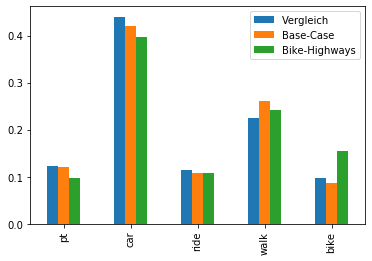

In [62]:
# copy the scenario names
columns = args.names.copy()
columns.insert(0, expected)

# create a data frame with relative values and plot it
relative = getRelative(modalShare, columns)
relative.plot.bar()

